# Relationships between variables

# Contents
# 1. Create a correlation matrix heatmap (colored)
# 2. Create a scatterplot
# 3. Create a pair plot
# 4. Create a categorical plot
# 5. Answers to previous questions
# 6. Hypotheses based on knowledge to now

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [4]:
matplotlib.__version__

'3.10.0'

In [6]:
# This option ensures the charts created are displayed in the notebook without the need to "call" them specifically.

%matplotlib inline

In [10]:
# Define file path
path = r'/Users/alison/Documents/Data Analysis - Tasks/6.1' 
# Get Electric Vehicle df
EV_df = pd.read_pickle(os.path.join(path,'02 Data', 'Prepared', 'EV_clean.pkl'))

In [12]:
EV_df.shape

(235689, 16)

In [14]:
EV_df.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'DOL Vehicle ID', 'Vehicle Location', 'Electric Utility',
       '2020 Census Tract'],
      dtype='object')

In [16]:
# Rename columns whose names are too long

EV_df.rename(columns = {'Electric Vehicle Type' : 'EV_Type', 'Clean Alternative Fuel Vehicle (CAFV) Eligibility': 'CAFV_Elig'},
                      inplace = True)

In [62]:
EV_df.dtypes

VIN (1-10)            object
County                object
City                  object
State                 object
Postal Code          float64
Model Year             int64
Make                  object
Model                 object
EV_Type               object
CAFV_Elig             object
Electric Range       float64
Base MSRP            float64
DOL Vehicle ID         int64
Vehicle Location      object
Electric Utility      object
2020 Census Tract    float64
dtype: object

In [18]:
EV_df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,EV_Type,CAFV_Elig,Electric Range,Base MSRP,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJ3E1EBXK,King,Seattle,WA,98178.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220.0,0.0,477309682,POINT (-122.23825 47.49461),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,5YJYGDEE3L,Kitsap,Poulsbo,WA,98370.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291.0,0.0,109705683,POINT (-122.64681 47.73689),PUGET SOUND ENERGY INC,5.303509e+10
2,KM8KRDAF5P,Kitsap,Olalla,WA,98359.0,2023,HYUNDAI,IONIQ 5,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,230390492,POINT (-122.54729 47.42602),PUGET SOUND ENERGY INC,5.303509e+10
3,5UXTA6C0XM,Kitsap,Seabeck,WA,98380.0,2021,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,30.0,0.0,267929112,POINT (-122.81585 47.64509),PUGET SOUND ENERGY INC,5.303509e+10
4,JTMAB3FV7P,Thurston,Rainier,WA,98576.0,2023,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42.0,0.0,236505139,POINT (-122.68993 46.88897),PUGET SOUND ENERGY INC,5.306701e+10


# 1. Create a correlation matrix heatmap (colored)

In [76]:
# set aside non-numeric object columns
# this only leaves two columns from my dataset and seems a bit silly.
Plot_EV_df = EV_df[['Electric Range','Base MSRP']]

In [78]:
# Create a correlation matrix using pandas

Plot_EV_df.corr()

,Electric Range,Base MSRP
Electric Range,1.000000,0.115618
Base MSRP,0.115618,1.000000


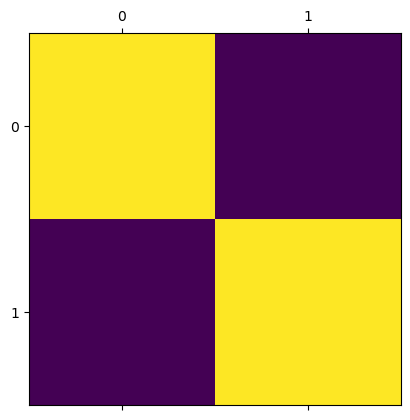

In [80]:
# Create a correlation heatmap using matplotlib

plt.matshow(Plot_EV_df.corr())
plt.show()

In [136]:
# save the image in the working directory. 
# Save figure
plt.matshow(Plot_EV_df.corr())
plt.savefig("out.png") 

In [130]:
#current dir
cwd = os.getcwd()
cwd

'/Users/alison/Documents/Data Analysis - Tasks/6.1/03 Scripts'

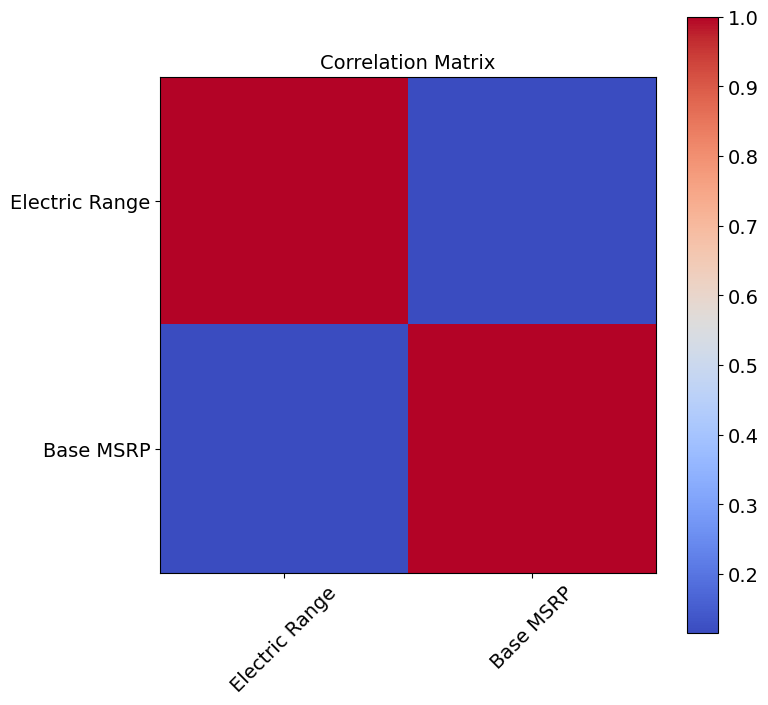

In [82]:
# Add labels, a legend, and change the size of the heatmap


EV_co_numeric_df = Plot_EV_df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = EV_co_numeric_df.corr()

plt.figure(figsize=(8, 8))  # Create a figure with size
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest') #matshow was causing an error so I used imshow
plt.xticks(range(correlation_matrix.shape[1]), correlation_matrix.columns, fontsize=14, rotation=45)  # x axis labels
plt.yticks(range(correlation_matrix.shape[1]), correlation_matrix.columns, fontsize=14)  # y axis labels
cb = plt.colorbar()  # add a color legend (called colorbar)
cb.ax.tick_params(labelsize=14)  # add font size
plt.title('Correlation Matrix', fontsize=14)  # add title
plt.show()  # show the plot

In [146]:
# save the image in the working directory. 
# Save figure
plt.imshow(EV_co_numeric_df.corr())
plt.savefig("correlation matrix.png")

In [84]:
# Discuss what the coefficients in the plot mean in terms of the relationships between the variables.
# There is a weak relationship between the two numeric variables (Electric Range, Base MSRP) in the dataset, 0.2. 
# The weakest correlation is between the census tract dummy value and the other variables.
# Try same with seaborn. 
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(Plot_EV_df.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.

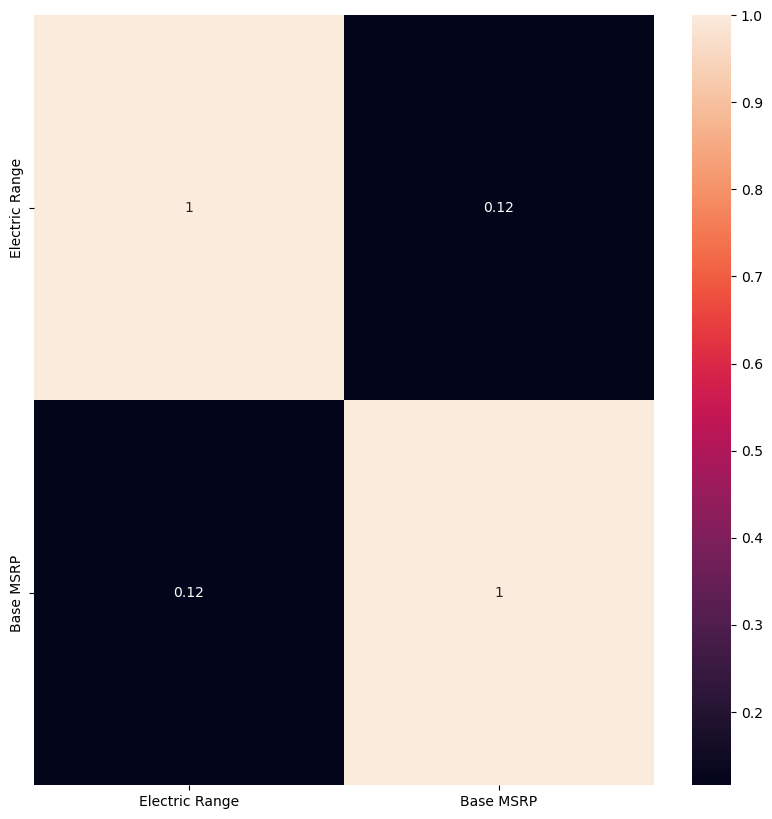

In [86]:
plt.show()

# 2. Create a scatterplot

In [138]:
# Create a scatterplot for the "Base MSRP" and "Electric Range" columns in seaborn
g2 = sns.lmplot(x = 'Base MSRP', y = 'Electric Range', data = EV_df)

In [142]:
# Save figure
g2.savefig('lmplot_base_msrp_vs_electric_range.png')

In [156]:
# All the zero values are not helping. 
# The outlier base MSRP value of 843,000 is obvious here. 
# Also revealing a weak correlation between electric range and Base MSRP. 
# I don't have any stronger relationships to correlate.
###
# Create a pair plot of the entire data set.
# Keep only the variables you want to use in the pair plot

sub = EV_df[['Postal Code', 'Model Year', 'Electric Range','Base MSRP',]]

# 3. Create a pair plot

In [158]:
# Create a pair plot 

g = sns.pairplot(sub)
g.savefig('pair.png')

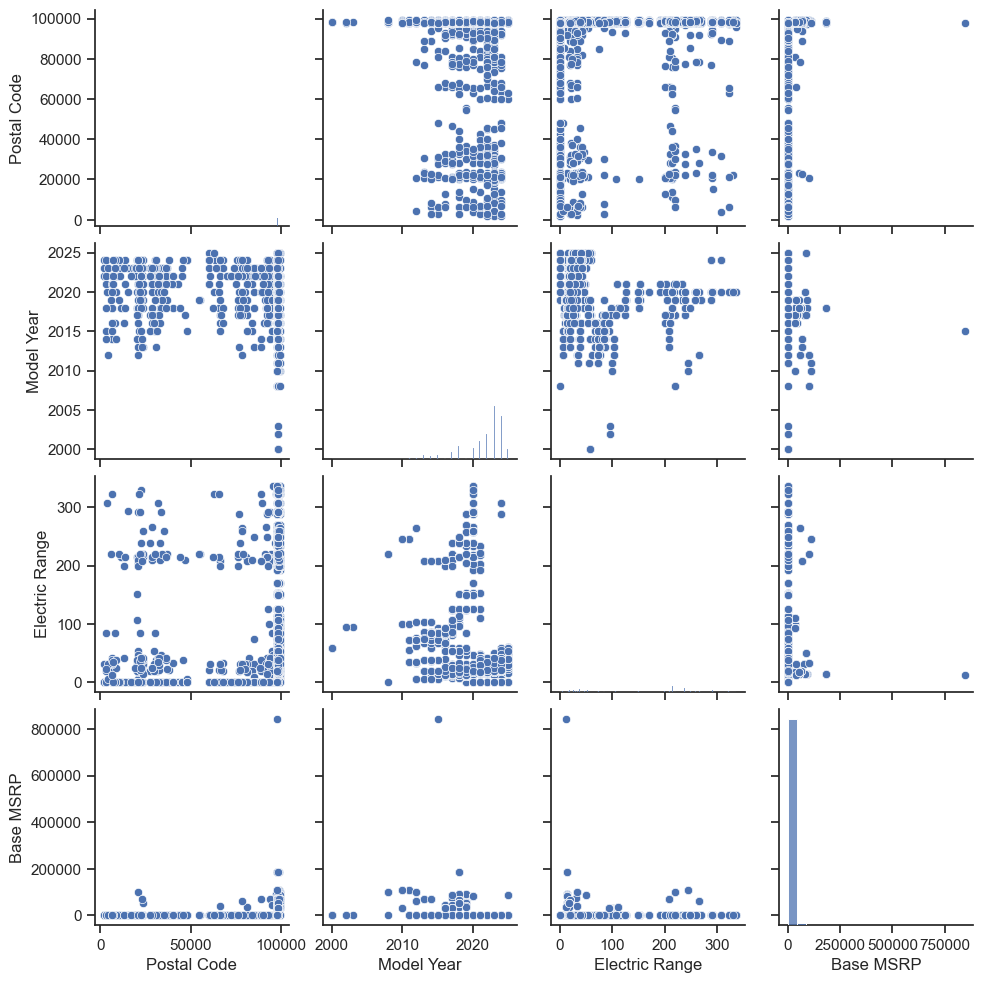

In [160]:
plt.show()

In [98]:
# There are some interesting observations here. The histograms remind me of my histograms in 6.1, with a high frequency of zeros. 
# There are some improvements to Electric Range with in recent model years but there are greater low values consistently across time.
# It seems that EVs are found in particular postcodes and not others. Explore further.
# Ignoring the outlier the MSRP has been reasonably constant across model years. A few more expensive models hit the market from 2015-2020.
# There is a cluster of postcodes (3 dots) with 2000 model years, perhaps they were early adopters? Explore further.
# There are unfortunately no insights regarding Base MSRP because of the 0 values being broadly spread across other categories.
###
# Create a categorical plot and interpret the results.
# Use a histogram to visualize the distribution of the variables. 
# This way, you can determine sensible categories for the price ranges. 
# You don't want to end up with too few observations in any one of the categories.
# The argument "kde" add a line that encompasses the distribution

sns.histplot(EV_df['Electric Range'], bins = 20, kde = True)

<Axes: xlabel='Electric Range', ylabel='Count'>

# 4. Create a categorical plot

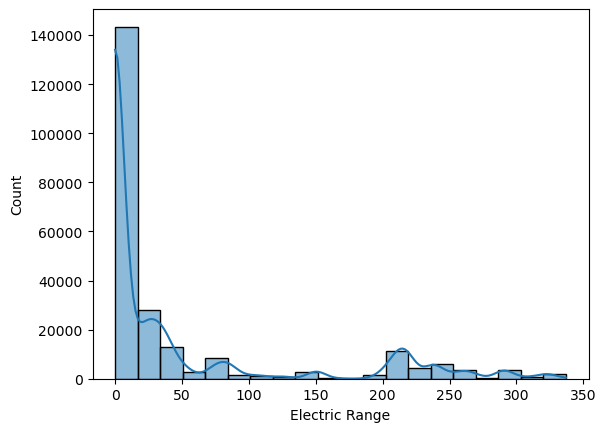

In [100]:
plt.show()

In [102]:
# 0-20 unknown, 20-200, over 200.
EV_df.loc[EV_df['Electric Range'] < 20, 'ER'] = 'Unknown'

In [112]:
EV_df.loc[(EV_df['Electric Range'] >= 20) & (EV_df['Electric Range'] < 200), 'ER'] = 'Fair'

In [114]:
EV_df.loc[EV_df['Electric Range'] >= 200, 'ER'] = 'Long'

In [116]:
EV_df['ER'].value_counts(dropna = False)

ER
Unknown    148188
Fair        54500
Long        33001
Name: count, dtype: int64

In [118]:
EV_df.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'EV_Type', 'CAFV_Elig', 'Electric Range', 'Base MSRP',
       'DOL Vehicle ID', 'Vehicle Location', 'Electric Utility',
       '2020 Census Tract', 'ER'],
      dtype='object')

In [124]:
# Create a categorical plot in seaborn using the ER categories created above

sns.set(style="ticks")
g = sns.catplot(x='Model Year', y='Electric Range', hue='ER', data=EV_df)
g.set_xticklabels(rotation=45) #rotate year labels for legibility

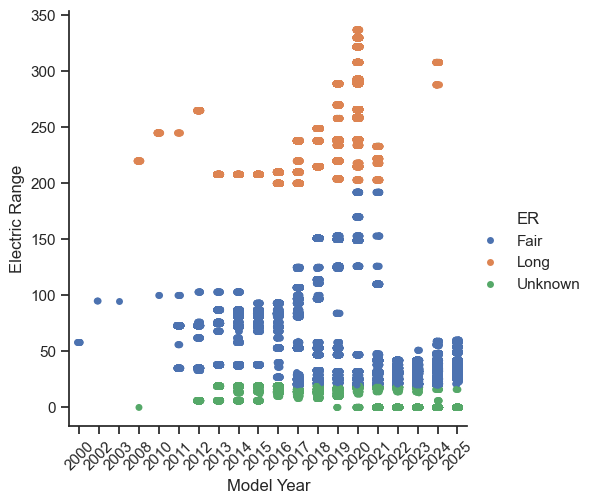

In [126]:
plt.show()

In [148]:
# fig = g.get_figure()
g.savefig("cat.png") 

# 5. Answers to previous questions

In [ ]:
# Following are questions that have been answered or partially answered from this analysis.
# Have the number of EVs in Washington increased over time? There are definitely more newer models than older ones.
# What is the age range of the EVs? Model years range from 2000 to 2025.
# Where are the oldest EVs located? Where are the newest? There are few 2000 models registered all in a similar location, but maybe there were more that are no longer registered.
# Has the average MSRP changed over time? There has been a 'reasonable' price across the model years but from 2015-2020 there were a higher number of more expensive models registered.
# Have there been improvements to Electric Range overtime? Yes, but there are many unnowns in the dataset. Some of the longest ER values are from 2020 models.

# 6. Hypotheses based on knowledge to now

In [ ]:
# The 2000 model EVs are in the same or neighbouring postcodes. 
# Plug-in hybrids have a lower ER than BEVs. 
# Sales of EVs peaked in 2020 and have been on the decline since. (Test the moment is over sentiment).
# There are more EVs in urban areas than suburban or rural areas.